In [ ]:
import tensorflow as tf
import wandb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import seaborn as sns


In [ ]:

# Initialize Weights & Biases
wandb.init(project="fashion-mnist-classification")

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [ ]:

# Define model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 34ms/step - accuracy: 0.7458 - loss: 0.6922 - val_accuracy: 0.8570 - val_loss: 0.3806
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.8787 - loss: 0.3366 - val_accuracy: 0.8779 - val_loss: 0.3266
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.8975 - loss: 0.2787 - val_accuracy: 0.8974 - val_loss: 0.2812
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9088 - loss: 0.2443 - val_accuracy: 0.8971 - val_loss: 0.2759
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9177 - loss: 0.2193 - val_accuracy: 0.9003 - val_loss: 0.2727
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9261 - loss: 0.1979 - val_accuracy: 0.9070 - val_loss: 0.2574
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9339 - loss: 0.1786 - val_accuracy: 0.9037 - val_loss: 0.2725
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9390 -

In [ ]:
# Predictions
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
wandb.log(report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


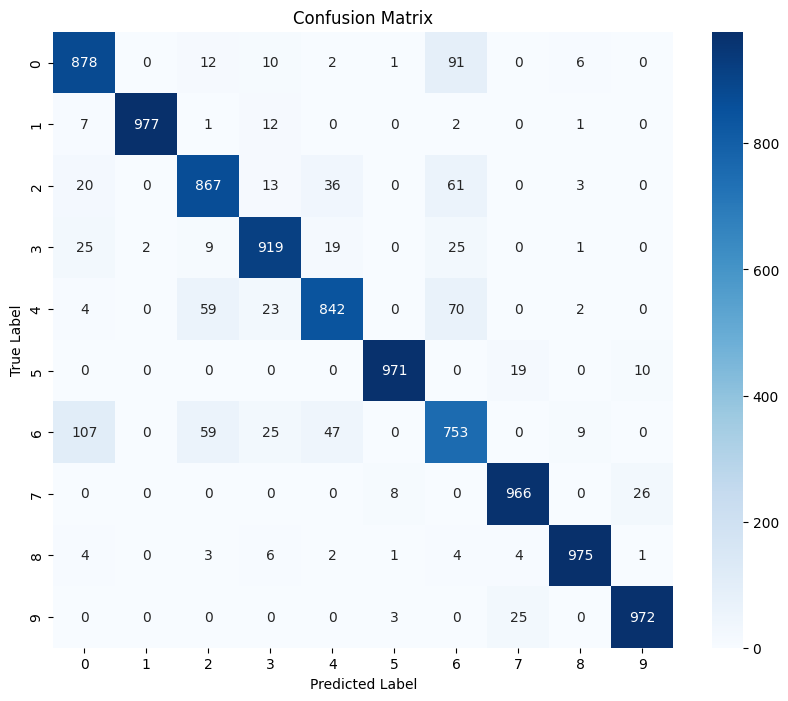

<Figure size 640x480 with 0 Axes>

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
wandb.log({"confusion_matrix": wandb.Image(plt)})



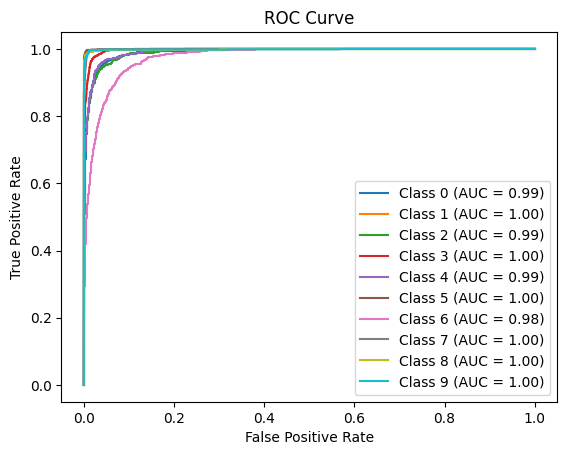

<Figure size 640x480 with 0 Axes>

In [ ]:
# ROC and PR Curves
for i in range(10):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_pred_probs[:, i])
    precision, recall, _ = precision_recall_curve((y_test == i).astype(int), y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
wandb.log({"roc_curve": wandb.Image(plt)})



In [ ]:
for i in range(10):
    idx = np.where(y_test == i)[0][:5]
    fig, axes = plt.subplots(1, 5, figsize=(10, 2))
    for j, ax in enumerate(axes):
        ax.imshow(x_test[idx[j]].reshape(28, 28), cmap='gray')
        ax.set_title(f'Class {i}')
        ax.axis('off')

    plt.tight_layout()
    wandb.log({f'class_{i}_examples': wandb.Image(fig)})  # Fix here
    plt.close(fig)  # Close figure to avoid memory leaks